At the beginning we have to discover the data and make some process on it. We started with
converting categorical features to numeric features.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("dataset/csv_building_structure.csv")

# Convert categorical damages to numeric values

def grade_to_numeric(grade):
    if isinstance(grade, float):
        return -1
    return int(grade[-1])


def age_to_numeric(age): # Group ages in group of 5
    if age > 100:
        return 21
    return age // 5

For other categorical features, we used pandas' get_dummies function. With this function, each
unique class became a feature. 

In [17]:
land_surface_condition = pd.get_dummies(data['land_surface_condition'])

land_surface_condition.drop('Flat', axis = 1, inplace = True)
data.drop('land_surface_condition', axis = 1, inplace = True)

land_surface_condition.columns = ['land_surface_condition_Moderate_slope', 'land_surface_condition_Steep_slope']

for col in land_surface_condition.columns: 
    print(str(col))

land_surface_condition_Moderate_slope
land_surface_condition_Steep_slope


In [18]:
roof_type = pd.get_dummies(data['roof_type'])

roof_type.drop('RCC/RB/RBC', axis = 1, inplace = True)
data.drop('roof_type', axis = 1, inplace = True)

roof_type.columns = ['roof_type_Bamboo/Timber-Heavy_roof', 'roof_type_Bamboo/Timber-Light_roof']

for col in roof_type.columns: 
    print(str(col))

roof_type_Bamboo/Timber-Heavy_roof
roof_type_Bamboo/Timber-Light_roof


In [19]:
ground_floor_type = pd.get_dummies(data['ground_floor_type'])

ground_floor_type.drop('Other', axis = 1, inplace = True)
data.drop('ground_floor_type', axis = 1, inplace = True)

ground_floor_type.columns = ['ground_floor_type_Brick/Stone', 'ground_floor_type_Mud', "ground_floor_type_RC", "ground_floor_type_Timber"]

for col in ground_floor_type.columns: 
    print(str(col))

ground_floor_type_Brick/Stone
ground_floor_type_Mud
ground_floor_type_RC
ground_floor_type_Timber


In [20]:
other_floor_type = pd.get_dummies(data['other_floor_type'])

other_floor_type.drop('RCC/RB/RBC', axis = 1, inplace = True)
data.drop('other_floor_type', axis = 1, inplace = True)

other_floor_type.columns = ['other_floor_type_Not_applicable', 'other_floor_type_TImber/Bamboo-Mud', "other_floor_type_Timber-Planck"]

for col in other_floor_type.columns: 
    print(str(col))

other_floor_type_Not_applicable
other_floor_type_TImber/Bamboo-Mud
other_floor_type_Timber-Planck


In [21]:
foundation_type = pd.get_dummies(data['foundation_type'])

foundation_type.drop('Other', axis = 1, inplace = True)
data.drop('foundation_type', axis = 1, inplace = True)

foundation_type.columns = ['foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick', "foundation_type_Mud mortar-Stone/Brick", "foundation_type_RC"]

for col in foundation_type.columns: 
    print(str(col))

foundation_type_Bamboo/Timber
foundation_type_Cement-Stone/Brick
foundation_type_Mud mortar-Stone/Brick
foundation_type_RC


In [22]:
position = pd.get_dummies(data['position'])

position.drop('Attached-3 side', axis = 1, inplace = True)
data.drop('position', axis = 1, inplace = True)

position.columns = ['position_Attached-1_side', 'position_Attached-2_side', "position_Not_attached"]

for col in position.columns: 
    print(str(col))

position_Attached-1_side
position_Attached-2_side
position_Not_attached


In [23]:
plan_configuration = pd.get_dummies(data['plan_configuration'])

plan_configuration.drop('Others', axis = 1, inplace = True)
data.drop('plan_configuration', axis = 1, inplace = True)

plan_configuration.columns = ["plan_configuration_Building_with_Central_Courtyard", "plan_configuration_E-shape", "plan_configuration_H-shape", "plan_configuration_L-shape", "plan_configuration_Multi_Projected", "plan_configuration_Rectangular", "plan_configuration_Square", "plan_configuration_T_Shape", "plan_configuration_U_Shape"]

for col in plan_configuration.columns: 
    print(str(col))

plan_configuration_Building_with_Central_Courtyard
plan_configuration_E-shape
plan_configuration_H-shape
plan_configuration_L-shape
plan_configuration_Multi_Projected
plan_configuration_Rectangular
plan_configuration_Square
plan_configuration_T_Shape
plan_configuration_U_Shape


In [24]:
# Add newly created features to dataframe

data = pd.concat([data,land_surface_condition], axis=1)
data = pd.concat([data,roof_type], axis=1)
data = pd.concat([data,ground_floor_type], axis=1)
data = pd.concat([data,other_floor_type], axis=1)
data = pd.concat([data,foundation_type], axis=1)
data = pd.concat([data,position], axis=1)
data = pd.concat([data,plan_configuration], axis=1)

data['target'] = data['damage_grade'].apply(grade_to_numeric)
data["age_building"] = data["age_building"].apply(age_to_numeric)

# Drop unnecessary features

data.drop('damage_grade', axis=1, inplace=True)
data.drop('technical_solution_proposed', axis=1, inplace=True)
data.drop('district_id', axis=1, inplace=True)
data.drop('vdcmun_id', axis=1, inplace=True)
data.drop('ward_id', axis=1, inplace=True)
data.drop('count_floors_post_eq', axis=1, inplace=True)
data.drop('height_ft_post_eq', axis=1, inplace=True)
data.drop('building_id', axis=1, inplace=True)
data.drop('condition_post_eq', axis=1, inplace=True)

print("------------------------------------")
print('NUMBER OF TOTAL FEATURES : ', len(data.columns))
print("------------------------------------")

------------------------------------
NUMBER OF TOTAL FEATURES :  43
------------------------------------


After finishing with categorical features, created a correlation matrix to see relationships between
all features. 

feature_names = data.columns
feature = data.iloc[:, :-1]
target = data.iloc[:, -1]

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=47,n_jobs=-1)
feature,target=sme.fit_resample(feature,target)

target=target.values.reshape(target.shape[0],1)
datanp=np.append(feature,target,axis=1)
print(datanp.shape)
data=pd.DataFrame(data=datanp,columns=feature_names)

corr_matrix = data.corr()
feature = corr_matrix.index
plt.figure(figsize = (45, 45))
graph = sns.heatmap(corr_matrix, linewidths = 0.1, annot = False)
bottom, top = graph.get_ylim()
graph.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('corr_mat.png', bbox_inches = "tight")
corr_target_row = corr_matrix["target"]

In [25]:
# Get count of each damage_level

damage_counts = []

for level in data.groupby('target').count()['age_building']:
    if level != 12: # if != null
        damage_counts.append(level)
    
damage_counts

[78815, 87257, 136412, 183844, 275766]

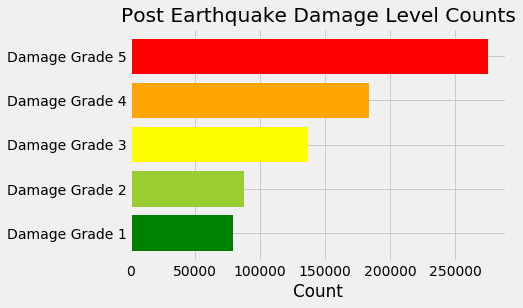

In [26]:
# Plotting each damage_level count

objects = []

for i in range(1,6):
    level = 'Damage Grade ' + str(i)
    objects.append(level)

y_pos = np.arange(1, len(damage_counts) + 1)
plt.style.use('fivethirtyeight')
plt.barh(y_pos, damage_counts, align = 'center', alpha = 1, color = ['green', 'yellowgreen', 'yellow', 'orange', 'red'])
plt.yticks(y_pos, objects)
plt.title('Post Earthquake Damage Level Counts')
plt.xlabel('Count')
plt.savefig('dist.png', bbox_inches='tight')

# See the correlation of each feature against target variable

corr_target_row = corr_target_row.sort_values(ascending = True)
corr_target_row.head()

# See the results better in a graph

plt.figure(figsize=(14, 14))
plt.hlines(y = corr_target_row.index, xmin = 0, xmax = corr_target_row.values)

for x, y, tex in zip(corr_target_row.values, corr_target_row.index, corr_target_row.values):
    t = plt.text(x, y, round(tex, 2), horizontalalignment = 'right' if x < 0 else 'left', 
    verticalalignment = 'center', fontdict = {'color':'red' if x < 0 else 'green', 'size':14})

plt.title('Correlation of features with respect to damage_grade', fontdict = {'size':20})
plt.savefig('cofwrtdg.png', bbox_inches = 'tight')"""

In [27]:
# Save results to a .csv file to use in ML models

data.to_csv(r'dataset/preprocessed.csv')

"""sortedFeatureCorr = corr_matrix["target"].sort_values(ascending = False).to_frame()
sortedFeatureCorr.to_csv(r"dataset/corr_resample.csv", index = True)"""



'sortedFeatureCorr = corr_matrix["target"].sort_values(ascending = False).to_frame()\nsortedFeatureCorr.to_csv(r"dataset/corr_resample.csv", index = True)'